# Loan Default Risk Analysis
This notebook contains exploratory data analysis (EDA) to identify drivers of loan default.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the loan dataset
loan = pd.read_csv('loan.csv', low_memory=False)
loan.shape


(39717, 111)

## Data Cleaning
We remove columns with too many nulls or irrelevant information.

In [3]:
# Drop columns with more than 85% missing values
loan = loan.loc[:, loan.isnull().mean() < 0.85]

# Remove irrelevant columns like IDs
drop_cols = ['id', 'member_id', 'url', 'emp_title', 'zip_code']
loan.drop(columns=[col for col in drop_cols if col in loan.columns], inplace=True, errors='ignore')

loan.shape


(39717, 50)

## Filter Dataset
Only include loans that are either 'Fully Paid' or 'Charged Off'.

In [4]:
loan = loan[loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
loan['loan_status'].value_counts(normalize=True)


loan_status
0    0.854136
1    0.145864
Name: proportion, dtype: float64

## Univariate Analysis
Explore single variables and their distributions.

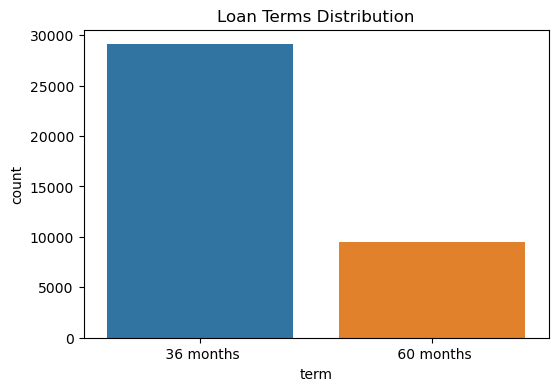

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='term', data=loan)
plt.title('Loan Terms Distribution')
plt.show()


## Bivariate Analysis
Analyze how different variables impact loan default.

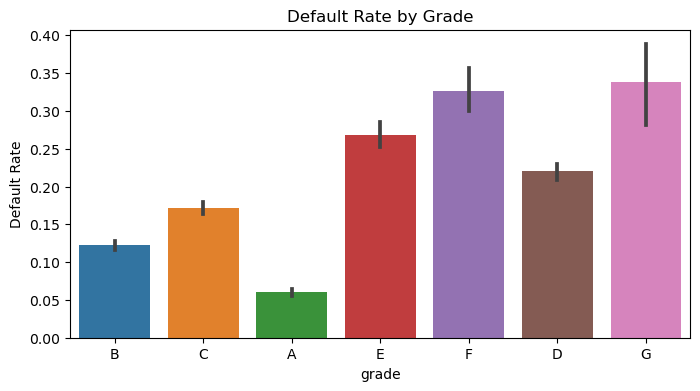

In [6]:
plt.figure(figsize=(8,4))
sns.barplot(x='grade', y='loan_status', data=loan)
plt.title('Default Rate by Grade')
plt.ylabel('Default Rate')
plt.show()


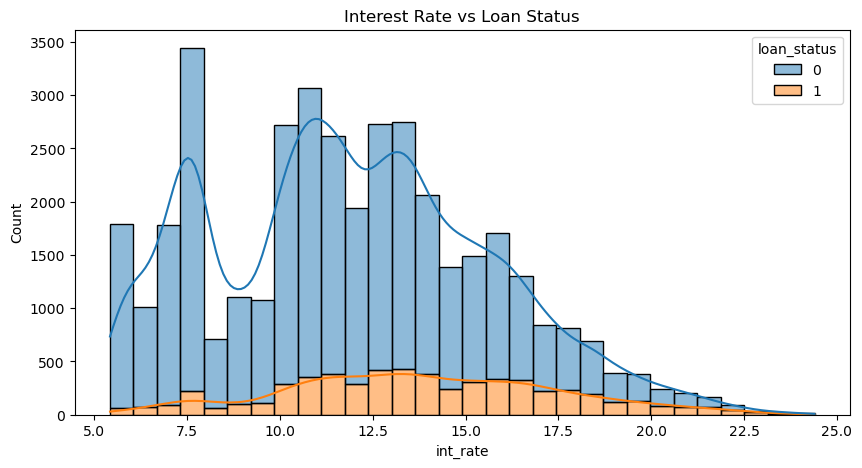

In [7]:
loan['int_rate'] = loan['int_rate'].str.replace('%','').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(data=loan, x='int_rate', hue='loan_status', bins=30, kde=True, multiple='stack')
plt.title('Interest Rate vs Loan Status')
plt.show()


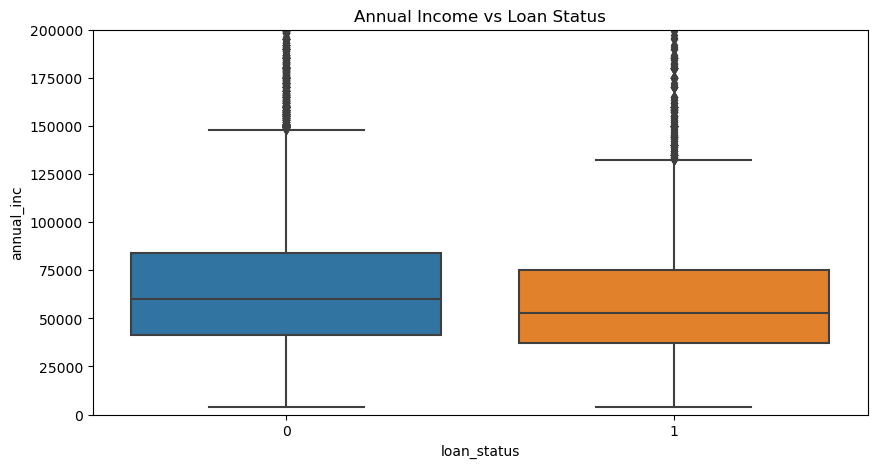

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status', y='annual_inc', data=loan)
plt.ylim(0, 200000)
plt.title('Annual Income vs Loan Status')
plt.show()


## Summary and Insights
- Default rates increase for longer loan terms, lower grades, and higher interest rates.
- Borrowers with lower income are more likely to default.
- The company can use these indicators for better risk assessment.